In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# Loading amazon uk price prediction dataset
amazon_prd_df = pd.read_csv("/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/5. WEEK 5/LABs WEEK 5/DAY 2/amz_uk_price_prediction_dataset.csv")

In [4]:
# Display the first few rows of the dataset
amazon_prd_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories

#Objective: Understand the relationship between product categories and their best-seller status.

    #1. Crosstab Analysis:

        #Create a crosstab between the product category and the isBestSeller status.


crosstab_amazon_prd = pd.crosstab(amazon_prd_df['category'], amazon_prd_df['isBestSeller'])

crosstab_amazon_prd

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
# Are there categories where being a best-seller is more prevalent?
# Calcular la suma de best-sellers y no best-sellers para cada categoría
category_sums = crosstab_amazon_prd.sum(axis=1)

# Calcular la proporción de best-sellers para cada categoría
proportion_best_sellers = crosstab_amazon_prd[True] / category_sums

# Ordenar las categorías según la proporción de best-sellers en orden descendente
sorted_categories = proportion_best_sellers.sort_values(ascending=False)

# Mostrar las categorías ordenadas
sorted_categories

# El top 5 de las categorías más prevalentes serían Grocery, Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accessories, Power & Hand Tools.

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

In [14]:
# Statistical Tests:

    # Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_amazon_prd)

chi2_statistic, chi2_p_value





(36540.20270061387, 0.0)

In [15]:
    # Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_amazon_prd, method="cramer")

0.1222829439760564

<AxesSubplot:xlabel='category'>

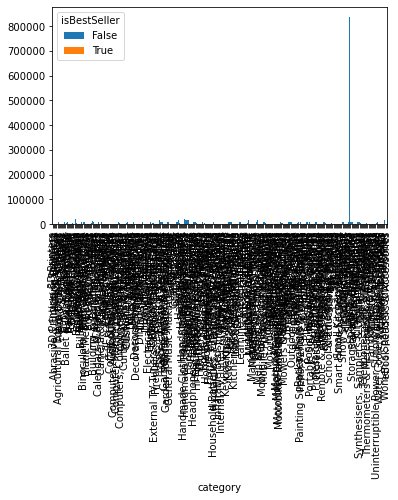

In [16]:
# 3. Visualizations:

    #Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_amazon_prd.plot(kind="bar", stacked=True)



In [18]:
top_5 = crosstab_amazon_prd.nlargest(5, True)
top_5

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


<AxesSubplot:xlabel='category'>

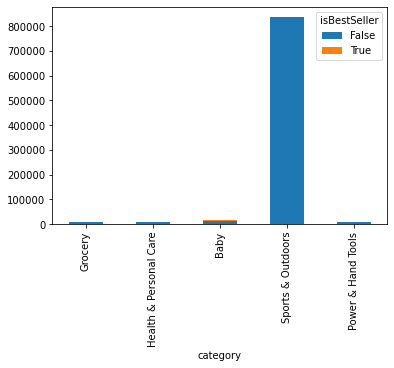

In [19]:
top_5.plot(kind="bar", stacked=True)

In [27]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands

#Objective: Investigate how different product categories influence product prices.

    #0. Preliminary Step: Remove outliers in product prices.
    #For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

def tukeys_test_outliers(price):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers
 

<AxesSubplot:xlabel='price', ylabel='category'>

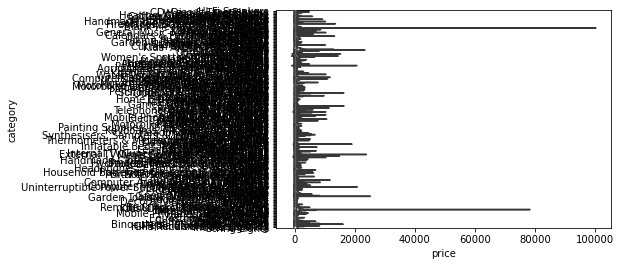

In [31]:
#1. Violin Plots:

    #Use a violin plot to visualize the distribution of price across different product categories. 
sns.violinplot(data=amazon_prd_df, x='price', y='category', palette="coolwarm")


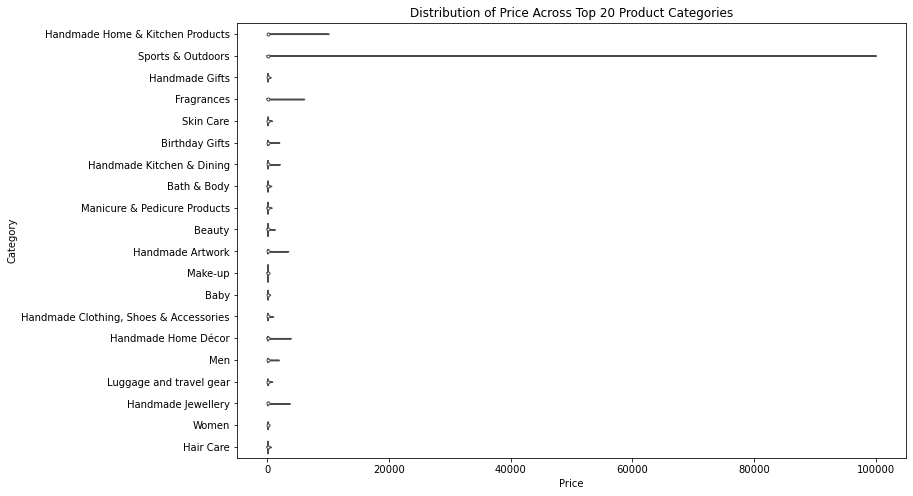

In [32]:
# Filter out the top 20 categories based on count for better visualization.

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el recuento de productos en cada categoría
category_counts = amazon_prd_df['category'].value_counts()

# Filtrar las 20 principales categorías
top_20_categories = category_counts.head(20).index

# Filtrar el DataFrame original para incluir solo las 20 principales categorías
filtered_df = amazon_prd_df[amazon_prd_df['category'].isin(top_20_categories)]

# Usar un gráfico de violín para visualizar la distribución de precios en las categorías filtradas
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='price', y='category', palette="coolwarm")
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

In [34]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

# Calcular la mediana del precio para cada categoría
median_price_by_category = amazon_prd_df.groupby('category')['price'].median()

# Encontrar la categoría con la mediana más alta
category_with_highest_median_price = median_price_by_category.idxmax()
highest_median_price = median_price_by_category.max()

print("Product category with the highest median price:", category_with_highest_median_price)
print("Highest median price:", highest_median_price)

Product category with the highest median price: Laptops
Highest median price: 1042.725


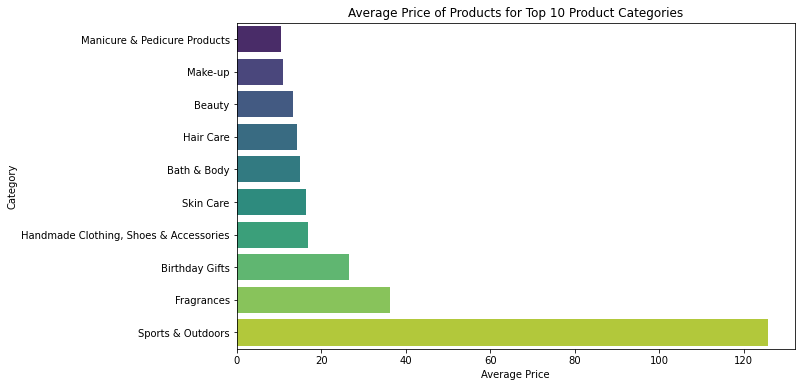

In [35]:
# 2. Bar Charts:

    # Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el recuento de productos en cada categoría
category_counts = amazon_prd_df['category'].value_counts()

# Seleccionar las 10 principales categorías basadas en el recuento
top_10_categories = category_counts.head(10).index

# Filtrar el DataFrame original para incluir solo las 10 principales categorías
filtered_df = amazon_prd_df[amazon_prd_df['category'].isin(top_10_categories)]

# Calcular el precio promedio de los productos para cada una de estas categorías
average_price_by_category = filtered_df.groupby('category')['price'].mean().sort_values()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_category.values, y=average_price_by_category.index, palette='viridis')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()


In [36]:
    # Which product category commands the highest average price? Don't filter here by top categories.

# Calcular el precio promedio para cada categoría
average_price_by_category = amazon_prd_df.groupby('category')['price'].mean()

# Encontrar la categoría con el precio promedio más alto
category_with_highest_avg_price = average_price_by_category.idxmax()
highest_avg_price = average_price_by_category.max()

print("Product category with the highest average price:", category_with_highest_avg_price)
print("Highest average price:", highest_avg_price)

Product category with the highest average price: Laptops
Highest average price: 1087.987826986755


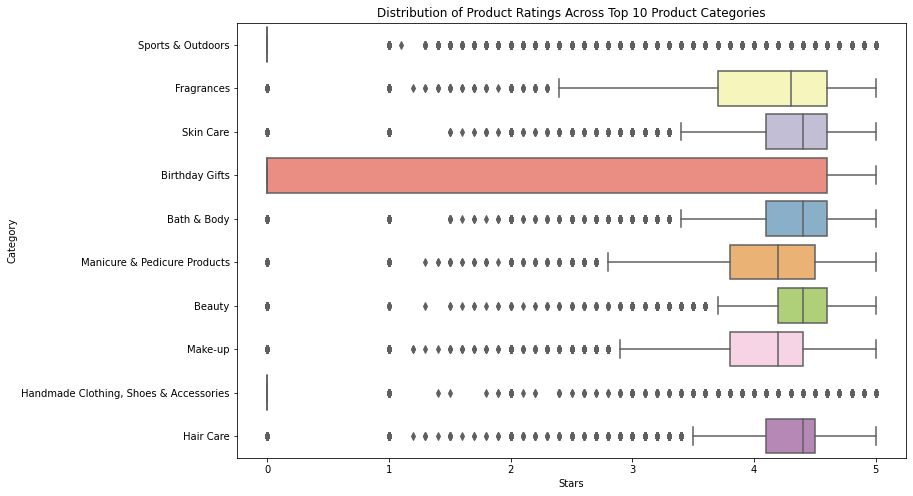

In [37]:
#3. Box Plots:

    #Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el recuento de productos en cada categoría
category_counts = amazon_prd_df['category'].value_counts()

# Seleccionar las 10 principales categorías basadas en el recuento
top_10_categories = category_counts.head(10).index

# Filtrar el DataFrame original para incluir solo las 10 principales categorías
filtered_df = amazon_prd_df[amazon_prd_df['category'].isin(top_10_categories)]

# Visualizar la distribución de las calificaciones de los productos en estas categorías filtradas
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='stars', y='category', palette='Set3')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Stars')
plt.ylabel('Category')
plt.show()

In [38]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

# Calcular la mediana de las calificaciones para cada categoría
median_rating_by_category = amazon_prd_df.groupby('category')['stars'].median()

# Encontrar la categoría con la mediana más alta de calificaciones
category_with_highest_median_rating = median_rating_by_category.idxmax()
highest_median_rating = median_rating_by_category.max()

print("Product category with the highest median rating:", category_with_highest_median_rating)
print("Highest median rating:", highest_median_rating)


Product category with the highest median rating: Computer Memory
Highest median rating: 4.7


In [41]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings

#Objective: Analyze how product ratings (stars) correlate with product prices.

    #1. Correlation Coefficients:
        #Calculate the correlation coefficient between price and stars.
# Calculating the Pearson correlation coefficient
correlation = amazon_prd_df['price'].corr(amazon_prd_df['stars'])
correlation


-0.12490673262149232

In [ ]:
    #Is there a significant correlation between product price and its rating?

#El coeficiente de correlación de Pearson calculado entre el precio y las calificaciones es aproximadamente -0.125. Un coeficiente de correlación negativo indica una relación inversa 
#entre las dos variables, lo que sugiere que a medida que el precio aumenta, las calificaciones tienden a disminuir, y viceversa. Sin embargo, la magnitud del coeficiente es relativamente 
#baja, lo que sugiere una correlación débil entre el precio y las calificaciones.

<AxesSubplot:xlabel='stars', ylabel='price'>

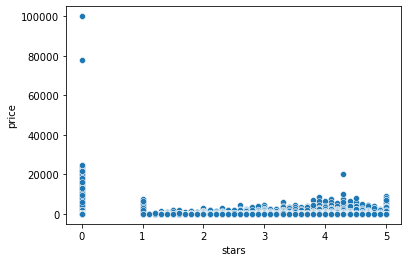

In [44]:
#Visualizations:

    #Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(data=amazon_prd_df, x='stars', y='price')

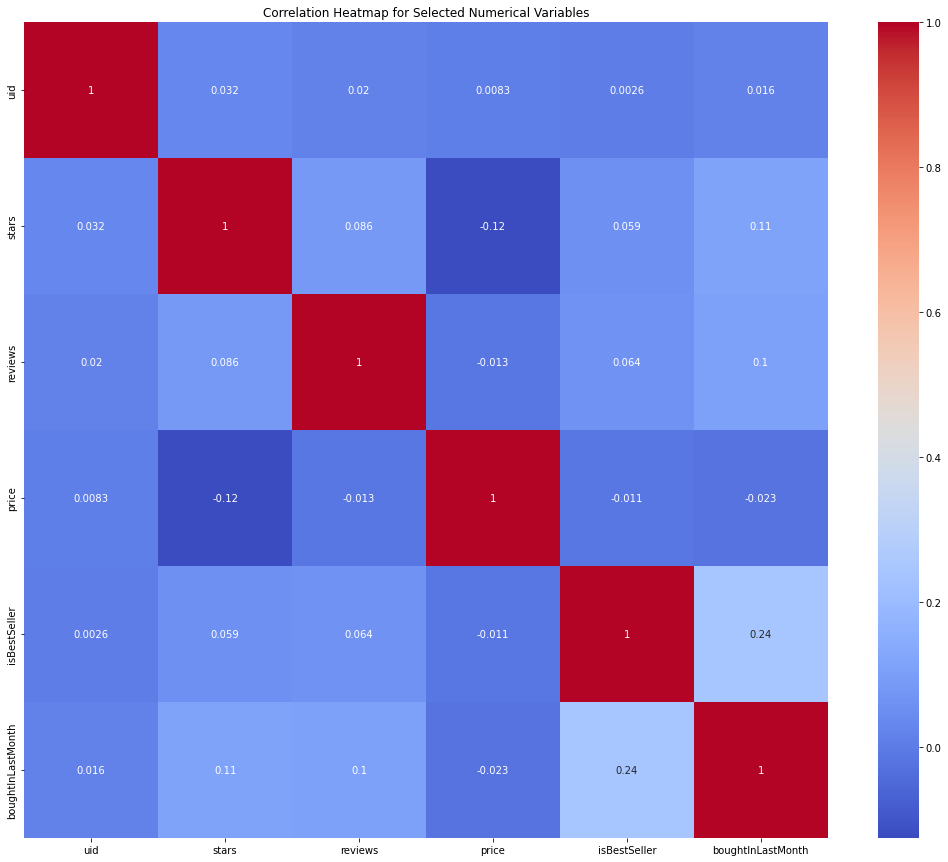

In [46]:
    #Use a correlation heatmap to visualize correlations between all numerical variables.
correlation_matrix = amazon_prd_df.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

/Users/juanfransf/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


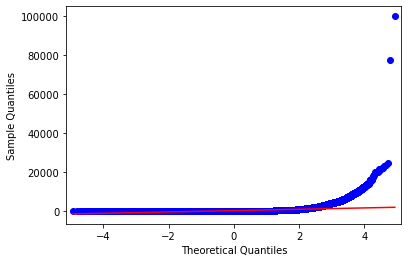

In [51]:
    # Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

sm.qqplot(amazon_prd_df['price'], line='s');

In [54]:
#Bonus:
# Calculating the Pearson correlation coefficient without removing outliers
correlation_with_outliers = amazon_prd_df['price'].corr(amazon_prd_df['stars'])
correlation_with_outliers

-0.12490673262149232